# Simple Linear Regression 

## Importing libraries 

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## Importing the dataset 
https://www.kaggle.com/rohankayan/years-of-experience-and-salary-dataset

In [5]:
dataset = pd.read_csv("Salary_Data.csv")

In [6]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 544.0 bytes


## Seprarting the dependent and the independent variables 

In [8]:
X = dataset.iloc[:,:-1].values 
Y = dataset.iloc[:,-1].values 

In [9]:
X #2D array

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [10]:
Y # 1D array

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

##  Splitting into training and test set

sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=1/3)

In [20]:
print("Shape of X_train is {} ; X_test is {}; Y_train is {}; Y_test is {}".format
     (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape))

Shape of X_train is (20, 1) ; X_test is (10, 1); Y_train is (20,); Y_test is (10,)


## Training the Simple Linear Regression Model on the Training set

class sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

Methods

fit(X, y[, sample_weight]) : Fit linear model.

get_params([deep]) : Get parameters for this estimator.

predict(X): Predict using the linear model.

score(X, y[, sample_weight]): Return the coefficient of determination R^2 of the prediction.

set_params(**params) : Set the parameters of this estimator.

In [22]:
regressor.fit(X_train,Y_train)

In [33]:
print(regressor.coef_)
print(regressor.intercept_)

[9528.70452613]
25624.72009354623


In [43]:
regressor.score(X_train,Y_train)

0.9569583012725216

## Predict the Test set results 

In [35]:
Y_pred = regressor.predict(X_test)

In [38]:
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),
                     axis=1))

[[ 81844.08  81363.  ]
 [ 68503.89  61111.  ]
 [ 93278.52  98273.  ]
 [100901.49 101302.  ]
 [111383.06 105582.  ]
 [ 62786.67  63218.  ]
 [123770.38 122391.  ]
 [ 56116.57  64445.  ]
 [ 63739.54  55794.  ]
 [ 90419.91  91738.  ]]


## Visualize Training and Test set 

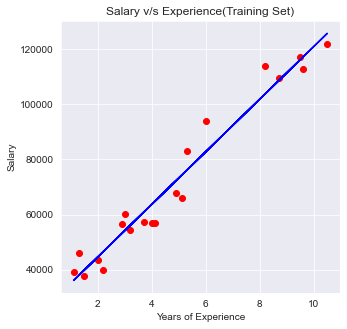

In [58]:
plt.figure(figsize=(5,5))
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Salary v/s Experience(Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

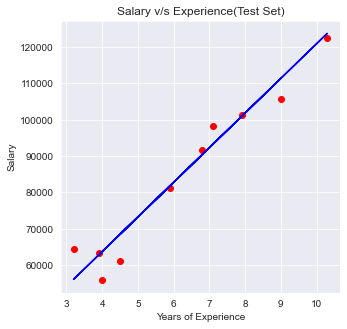

In [59]:
plt.figure(figsize=(5,5))
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,Y_pred,color='blue')
plt.title('Salary v/s Experience(Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Metrics 
### The r2_score function computes the coefficient of determination, usually denoted as R².

It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

As such variance is dataset dependent, R² may not be meaningfully comparable across different datasets. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0.

sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')

In [61]:
from sklearn.metrics import r2_score
accuracy = r2_score(Y_test,Y_pred)
print(accuracy)

0.946135529991833
